In [1]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("DataMDNonTidalWLBWDB91.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [6]:

df_baruria = df[df["STATIONID"] == "91.9L"]
df_goalunda =df[df["STATIONID"] == "91.9R"]

In [8]:
df_baruria = df_baruria.sort_values(by = ["YEAR","MONTH"])
df_goalunda = df_goalunda.sort_values(by = ["YEAR","MONTH"])

In [12]:
monthly_baruria = df_baruria.groupby("MONTH").agg({'MAXOFTSVALUE_UPDATED': 'max',
                                                   'MINOFTSVALUE_UPDATED': 'min',
                                                   'AVGOFTSVALUE_UPDATED': 'mean'})

monthly_goalunda = df_goalunda.groupby("MONTH").agg({'MAXOFTSVALUE_UPDATED': 'max',
                                                   'MINOFTSVALUE_UPDATED': 'min',
                                                   'AVGOFTSVALUE_UPDATED': 'mean'})

,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED,AVGOFTSVALUE_UPDATED
MONTH,,,
1,3.53,1.38,2.422000
2,2.93,1.31,2.091250
3,3.52,1.48,2.148500
4,4.51,1.57,2.819750
5,6.40,2.61,4.057561
6,7.83,3.37,5.740488
7,9.88,4.98,7.359250
8,9.30,6.42,7.733171
9,9.58,6.01,7.564878


In [13]:
import calendar
monthly_baruria = monthly_baruria.reset_index()
monthly_baruria['MONTH'] = monthly_baruria['MONTH'].apply(lambda x: calendar.month_abbr[x])


monthly_goalunda = monthly_goalunda.reset_index()
monthly_goalunda['MONTH'] = monthly_goalunda['MONTH'].apply(lambda x: calendar.month_abbr[x])



In [17]:
monthly_baruria.columns = ["Month", "Maximum","Minimum","Average"]
monthly_goalunda.columns = ["Month", "Maximum","Minimum","Average"]

In [19]:
monthly_baruria.to_excel("91.9L_monthly.xlsx")
monthly_goalunda.to_excel("91.9R_monthly.xlsx")

In [20]:
sns.set(rc={'figure.figsize':(5,3.5)})
sns.set_style("whitegrid")


In [21]:
month_order = ["Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","Jan","Feb","Mar"]
monthly_baruria = monthly_baruria.set_index(monthly_baruria["Month"]).loc[month_order]

monthly_goalunda = monthly_goalunda.set_index(monthly_goalunda["Month"]).loc[month_order]





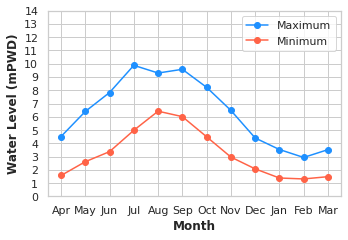

In [26]:
fig, ax = plt.subplots()
ax = plt.plot(monthly_baruria["Maximum"], color = 'dodgerblue',marker = 'o', label = "Maximum")
ax = plt.plot(monthly_baruria["Minimum"], color = 'tomato',marker = 'o', label = "Minimum")
plt.legend()
plt.yticks(np.arange(0,15,1))

plt.xlabel("Month", fontweight="semibold")
plt.ylabel("Water Level (mPWD)", fontweight="semibold")
plt.tight_layout()
plt.savefig("91.L_WL.jpg", dpi = 500)

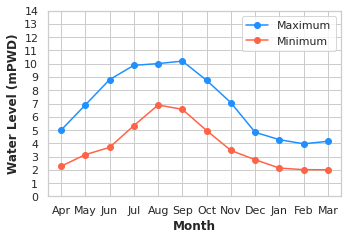

In [27]:
fig, ax = plt.subplots()
ax = plt.plot(monthly_goalunda["Maximum"], color = 'dodgerblue',marker = 'o', label = "Maximum")
ax = plt.plot(monthly_goalunda["Minimum"], color = 'tomato',marker = 'o', label = "Minimum")
plt.legend()
plt.yticks(np.arange(0,15,1))

plt.xlabel("Month", fontweight="semibold")
plt.ylabel("Water Level (mPWD)", fontweight="semibold")
plt.tight_layout()
plt.savefig("91.R_WL.jpg", dpi = 500)

In [29]:
df.describe()

,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED,AVGOFTSVALUE_UPDATED
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,1987.198207,6.590637,5.624641,4.410817,4.996873
std,13.191721,3.434148,2.328335,2.015499,2.171622
min,1964.000000,1.000000,1.810000,1.310000,1.510000
25%,1975.000000,4.000000,3.440000,2.610000,2.950000
50%,1988.000000,7.000000,5.440000,3.905000,4.545000
75%,1998.000000,10.000000,7.830000,6.355000,7.122500
max,2009.000000,12.000000,10.200000,8.890000,9.310000


In [33]:
df_baruria.nlargest(1,["MAXOFTSVALUE_UPDATED"])

,STATIONID,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED,AVGOFTSVALUE_UPDATED
187,91.9L,2004,7,9.88,7.08,8.84


In [34]:
df_baruria.nsmallest(1,["MINOFTSVALUE_UPDATED"])

,STATIONID,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED,AVGOFTSVALUE_UPDATED
60,91.9L,2006,2,1.81,1.31,1.51


In [35]:
df_goalunda.nlargest(1,["MAXOFTSVALUE_UPDATED"])

,STATIONID,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED,AVGOFTSVALUE_UPDATED
117,91.9R,1998,9,10.2,7.44,8.85


In [36]:
df_goalunda.nsmallest(1,["MINOFTSVALUE_UPDATED"])

,STATIONID,YEAR,MONTH,MAXOFTSVALUE_UPDATED,MINOFTSVALUE_UPDATED,AVGOFTSVALUE_UPDATED
996,91.9R,2007,3,2.45,2.0,2.18
